In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

In [ ]:
# creating a quantum circuit of 8 qubits

qc = QuantumCircuit(8)

In [ ]:
# measure all output qubits

qc.measure_all()

# draw the curcuit
qc.draw(initial_state=True)

In [8]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

NameError: name 'qc' is not defined

In [ ]:
qc1=QuantumCircuit(8)
qc1.x(7)
qc1.draw()

In [ ]:
qc1.measure_all()

In [ ]:
qc1.draw(initial_state=True)

In [ ]:
simulator = Aer.get_backend('aer_simulator')
results = simulator.run(qc1).result()
counts = results.get_counts()
plot_histogram(counts)

In [ ]:
# encoding my age as bit string 28 = 00011100

qc_age = QuantumCircuit(8)
qc_age.x(2)
qc_age.x(3)
qc_age.x(4)
qc_age.measure_all()

results = simulator.run(qc_age).result()
counts = results.get_counts()
plot_histogram(counts)

In [ ]:
# example of using CNOT gate - a quantum counterpart of XOR

qc_cx = QuantumCircuit(2)
qc_cx.cx(0,1)
qc_cx.draw(initial_state=True)

In [2]:
qc2 = QuantumCircuit(2,2)
qc2.x(0)
qc2.cx(1,0)
qc2.measure(0,0)
qc2.measure(1,1)

qc2.draw(initial_state=True)

┌───┐┌───┐┌─┐   
q_0: |0>┤ X ├┤ X ├┤M├───
        └───┘└─┬─┘└╥┘┌─┐
q_1: |0>───────■───╫─┤M├
                   ║ └╥┘
 c: 0 2/═══════════╩══╩═
                   0  1

In [3]:
qc2.measure_all()
qc2.draw(initial_state=True)

┌───┐┌───┐┌─┐    ░ ┌─┐   
  q_0: |0>┤ X ├┤ X ├┤M├────░─┤M├───
          └───┘└─┬─┘└╥┘┌─┐ ░ └╥┘┌─┐
  q_1: |0>───────■───╫─┤M├─░──╫─┤M├
                     ║ └╥┘ ░  ║ └╥┘
   c: 0 2/═══════════╩══╩═════╬══╬═
                     0  1     ║  ║ 
                              ║  ║ 
meas: 0 2/════════════════════╩══╩═
                              0  1

In [4]:
# an example of adding numbers in binary system
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1)


In [5]:
qc_ha.draw(initial_state=True)

┌───┐ ░            ░       
q_0: |0>┤ X ├─░───■────────░───────
        ├───┤ ░   │        ░       
q_1: |0>┤ X ├─░───┼────■───░───────
        └───┘ ░ ┌─┴─┐┌─┴─┐ ░ ┌─┐   
q_2: |0>──────░─┤ X ├┤ X ├─░─┤M├───
              ░ └───┘└───┘ ░ └╥┘┌─┐
q_3: |0>──────░────────────░──╫─┤M├
              ░            ░  ║ └╥┘
 c: 0 2/══════════════════════╩══╩═
                              0  1

In [6]:
# an example of using ccnot gate, a classical counterpart is the logical AND. 
qc_ha1 = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha1.x(0) # For a=0, remove the this line. For a=1, leave it.
qc_ha1.x(1) # For b=0, remove the this line. For b=1, leave it.
qc_ha1.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha1.cx(0,2)
qc_ha1.cx(1,2)
# use ccx to write the AND of the inputs on qubit 3
qc_ha1.ccx(0,1,3)
qc_ha1.barrier()
# extract outputs
qc_ha1.measure(2,0) # extract XOR value
qc_ha1.measure(3,1) # extract AND value

qc_ha1.draw()

┌───┐ ░                 ░       
q_0: ┤ X ├─░───■─────────■───░───────
     ├───┤ ░   │         │   ░       
q_1: ┤ X ├─░───┼────■────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1

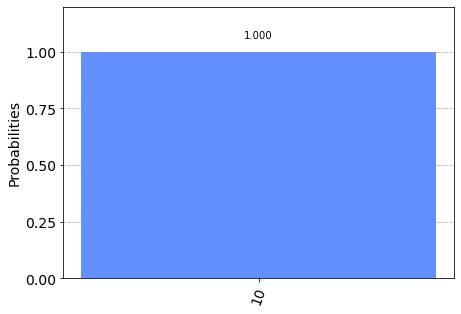

In [9]:
qobj = assemble(qc_ha1)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

In [10]:
import qiskit.tools.jupyter
%qiskit_version_table